# Simulated Annealing

Simulated annealing is stochastic opimization technique based on monte carlo methods.  If we remember back to our Ising model, we remember that lower temperatures moved to towards the low energy values while high temperatures sampled more of the domain (with a slight bias towards lower energy points).  To give a better example of why simulated annealing is global scheme, lets look at a potential commonly used in phase field methods
\begin{equation}
U = a(x-2)^2(x+2)^2+bx
\end{equation}
where $b$ is a driving force which drives phase transitions and $a$ is the Landau energy which determines the energy barrier between the two phases.  For our example, we will let $b=3$ and $a = 10$.  Now, we aren't looking at studying phase transformations here, just looking to find the lowest minima state. 

In [1]:
import numpy
import matplotlib.pyplot as plt

x = numpy.linspace(-3,3)
y = 10*(x-2)**2*(x+2)**2+3*x
plt.plot(x,y)
plt.show()
plt.ylabel('U')
plt.xlabel('x')


<Figure size 640x480 with 1 Axes>

Text(0.5,0,'x')

In [2]:
from scipy.optimize import minimize

def energy(x):
    return 10*(x-2)**2*(x+2)**2+3*x

result = minimize(energy, 0.1)
print(result.x)

[1.99055824]


$p(x) \propto e^{-f(x)/T}$

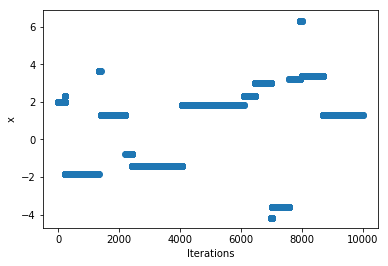

1.297110996898092


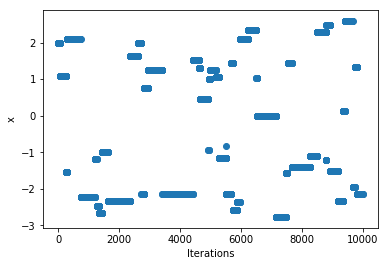

-2.146073929643832


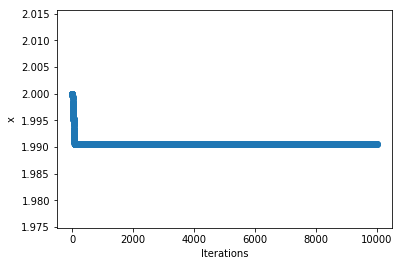

1.9905587477897064


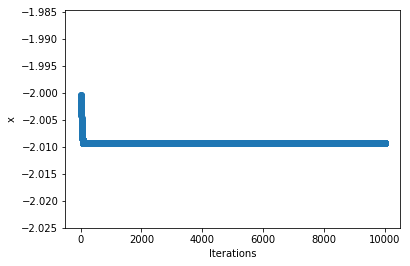

-2.0093098634355817


In [3]:
def Markov(x0= 2.0, T=3.0, nsim = 10000):
    eLast = energy(x0)
    #print(T)
    #print(x0)
    xx = []
    for i in range(nsim):
        xtest = x0 + numpy.random.randn()*numpy.sqrt(T*1e3)
        alpha = numpy.random.rand()
        eTest = energy(xtest)
        #print(eTest, eLast, numpy.exp(-(eLast-eTest)/T), alpha)
        if numpy.exp((eLast-eTest)/T) > alpha:
            eLast = eTest
            x0 = xtest
        xx.append(x0)
    plt.figure()
    plt.scatter(numpy.asarray(range(len(xx))),numpy.asarray(xx))
    plt.xlabel('Iterations')
    plt.ylabel('x')
    plt.show()
    return x0, xx

print(Markov(T=5000)[0])

print(Markov(T=100)[0])

print(Markov(x0 = 2.0, T= 1e-10)[0])

print(Markov(x0 = -2.0, T=1e-10)[0])

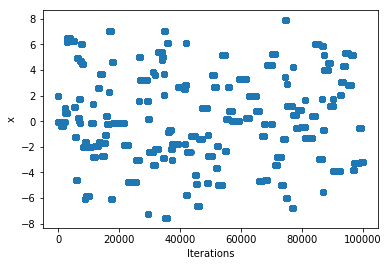

10000 -3.218942629053669


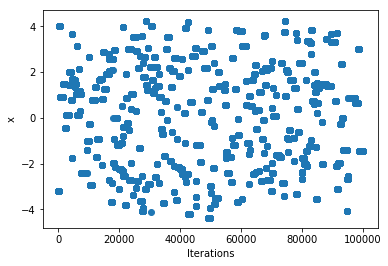

1000 -1.443309364636376


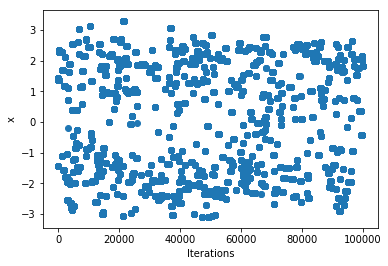

100 1.8215108045489066


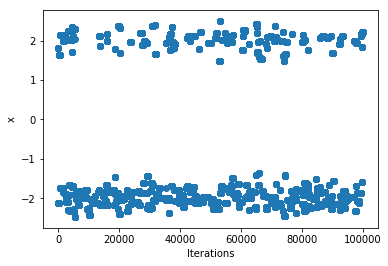

10 2.2282714945168807


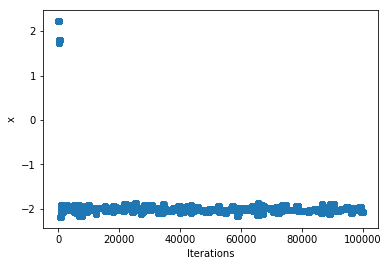

1 -2.0578487654511335


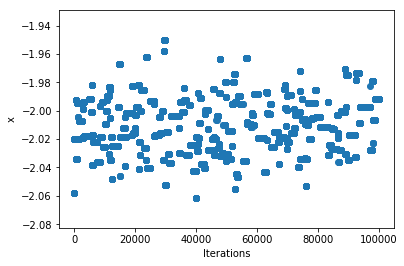

0.1 -1.9913860784247053


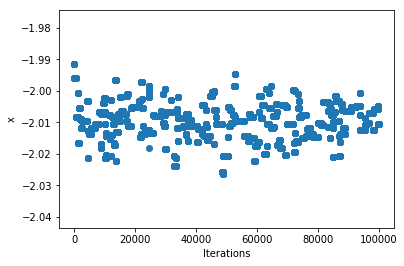

0.01 -2.010689493560423


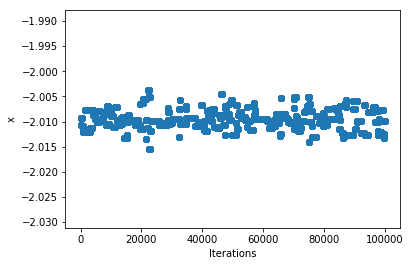

0.001 -2.009923011254755


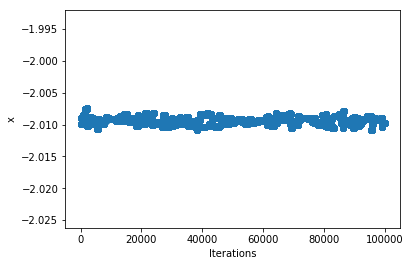

0.0001 -2.0098141796625635


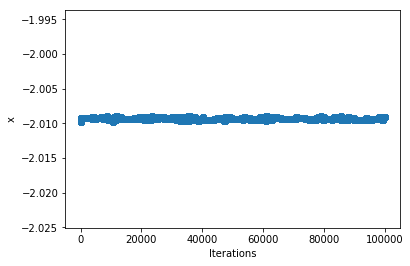

1e-05 -2.0091158192390437


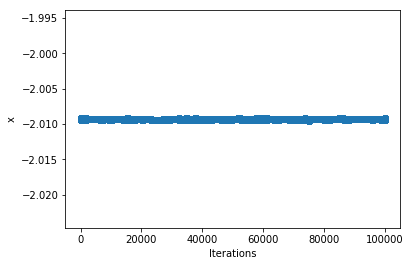

1e-06 -2.0091883765451364


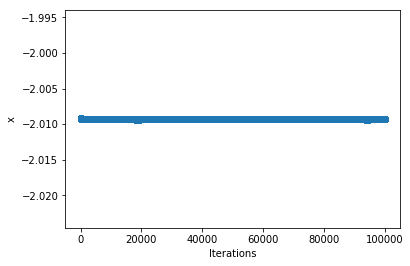

1e-07 -2.009311300304028


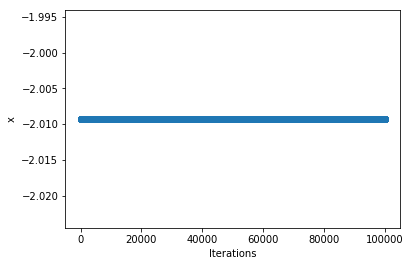

1e-08 -2.0093123181466677


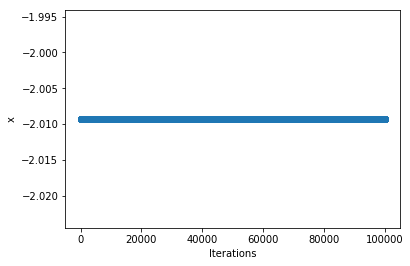

1e-09 -2.009311015462347


In [4]:
#Simulated Annealing high temperatures get out of local minima, low temperatures hone in on the minima
x0 = 2
for i in range(-4,10):
    T = 10**-i
    x0 = Markov(x0 = x0, T=T, nsim=100000)[0]
    print(T, x0)

In [5]:
from scipy.optimize import basinhopping
results = basinhopping(energy, 2)
print(results)

                        fun: 5.985870956335865
 lowest_optimization_result:       fun: 5.985870956335865
 hess_inv: array([[0.00317159]])
      jac: array([2.20537186e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([1.99055824])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 2010
                        nit: 100
                       njev: 670
                          x: array([1.99055824])
